In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
toyoto=pd.read_csv("Toyoto_Corrola.csv")
toyoto.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


### Data Preprocessing

In [4]:
toyoto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [5]:
toyoto=toyoto.drop(['Id','Model'],axis=1)
toyoto

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


In [6]:
toyoto=toyoto.rename({'Age_08_04':'Age'},axis=1)
toyoto

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


In [7]:
toyoto.isna().sum()

Price        0
Age          0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [8]:
toyoto.corr()

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


### Data Visualization

<Axes: xlabel='Doors'>

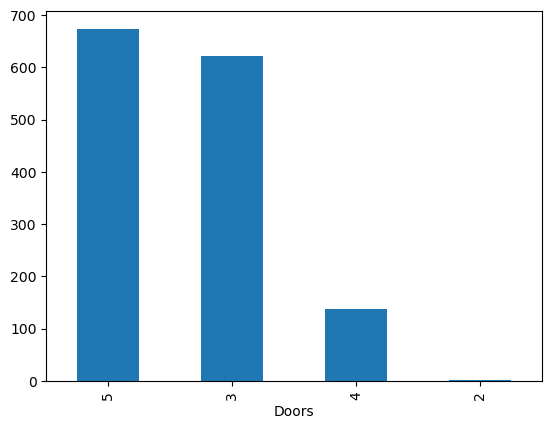

In [10]:
toyoto['Doors'].value_counts().plot(kind='bar')

<Axes: xlabel='Cylinders'>

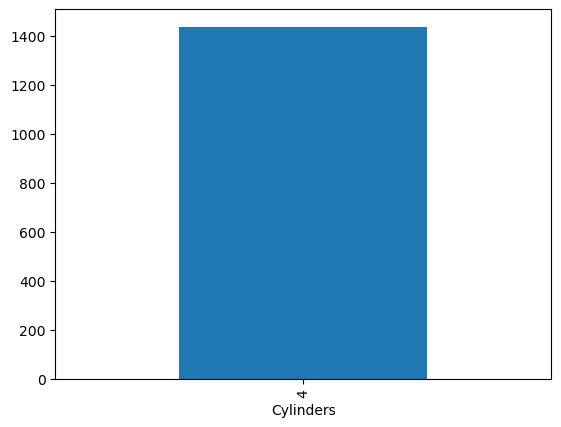

In [11]:
toyoto['Cylinders'].value_counts().plot(kind='bar')

<Axes: xlabel='Gears'>

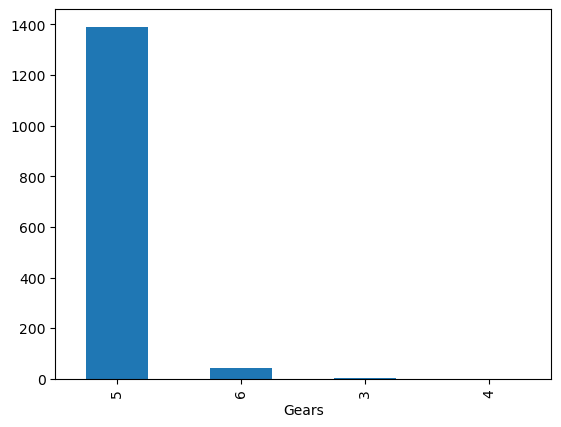

In [12]:
toyoto['Gears'].value_counts().plot(kind='bar')

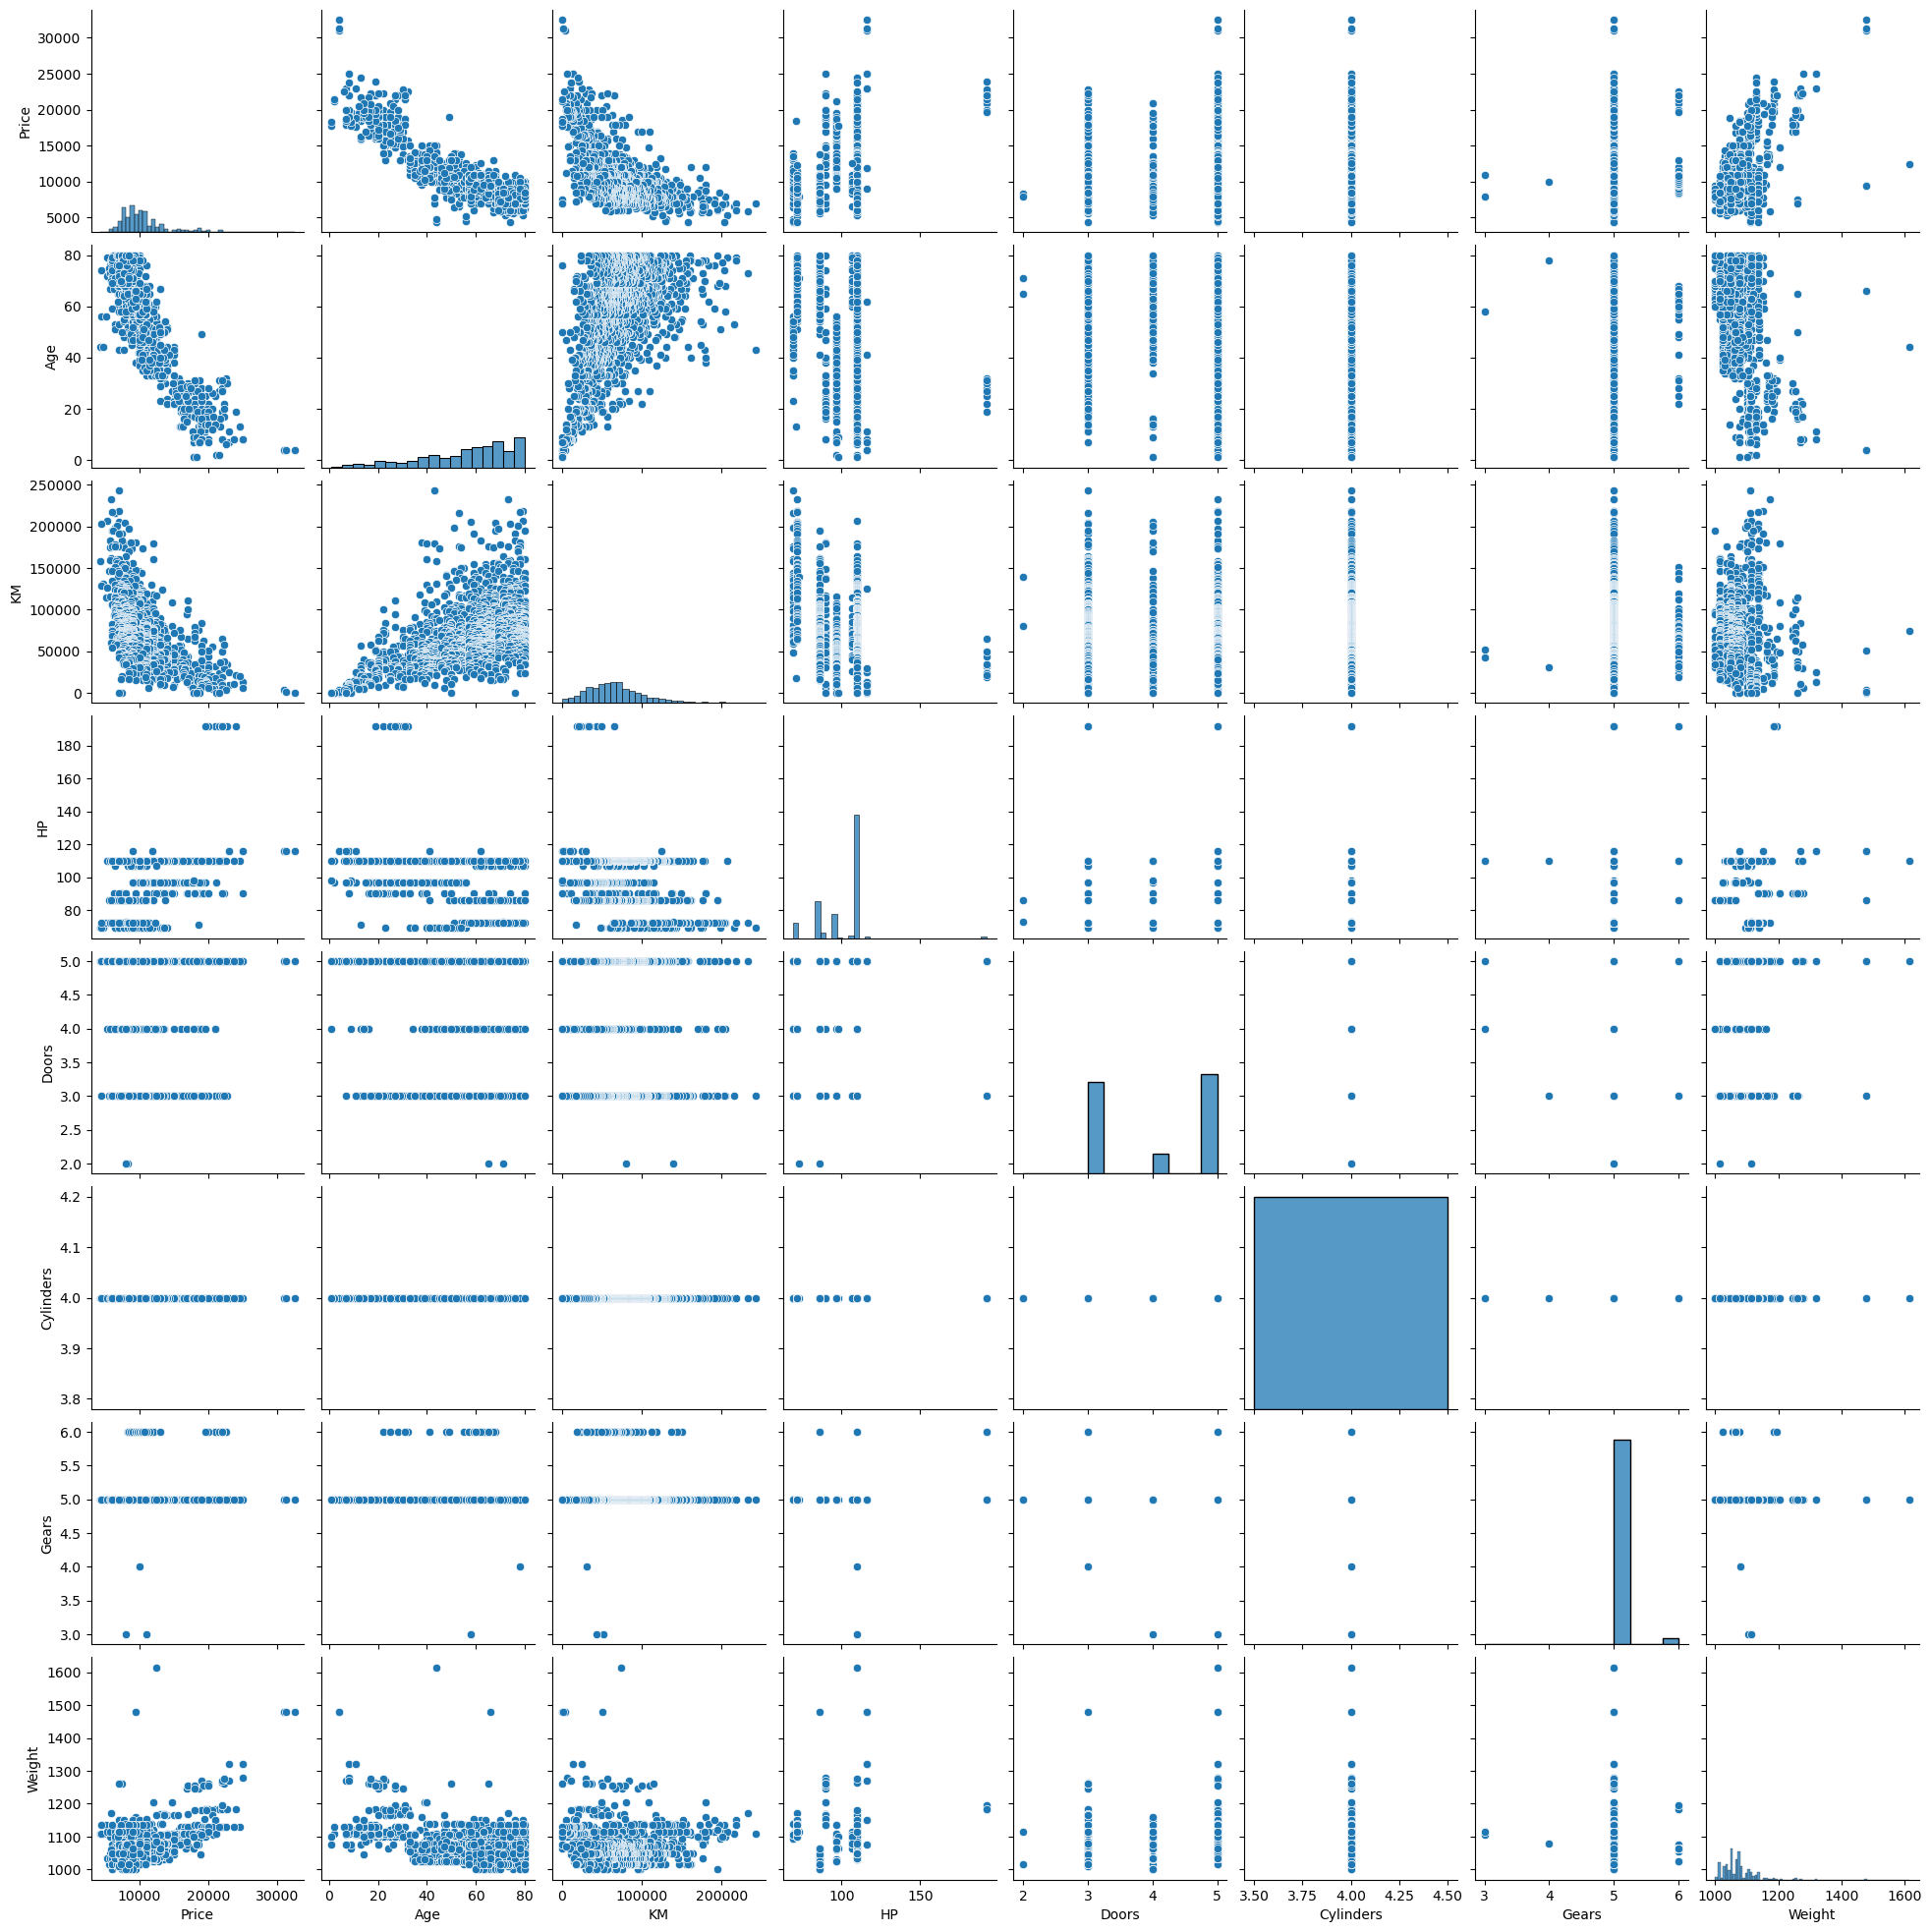

In [13]:
sns.pairplot(toyoto)

<Axes: >

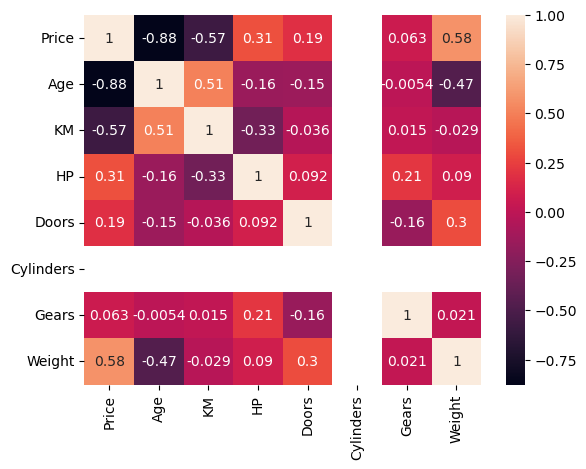

In [14]:
sns.heatmap(toyoto.corr(),annot=True)

### MULTIPLE LINEAR REGRESSION

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x=toyoto.drop(['Price'],axis=1)
y=toyoto[['Price']]

In [18]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [19]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1148, 7) (288, 7) (1148, 1) (288, 1)


In [20]:
from sklearn import linear_model
from sklearn.metrics import classification_report

In [21]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [22]:
#Predicting on test data
preds = regr.predict(x_test) # predicting on test data set 

In [23]:
preds

array([[12048.91184314],
       [15950.53185197],
       [10675.35515551],
       [ 8133.73199895],
       [11183.89605115],
       [ 9980.28161176],
       [11694.13881043],
       [17594.11293369],
       [11633.68926376],
       [10088.9940388 ],
       [13341.12157175],
       [ 9299.97333197],
       [14259.09833708],
       [ 9995.08298097],
       [ 7747.17297203],
       [10042.06462905],
       [13295.57477537],
       [13093.78166372],
       [10403.5821942 ],
       [18034.77742733],
       [ 9142.57926318],
       [11536.28008344],
       [10028.65598177],
       [12470.79835743],
       [14027.0472177 ],
       [ 6914.33555419],
       [11502.84035272],
       [15780.0352974 ],
       [10843.75383719],
       [ 8913.79671879],
       [ 7709.69280106],
       [ 4655.51269342],
       [ 9868.77781638],
       [10192.38213178],
       [ 7705.60361644],
       [12657.98045291],
       [14358.48463814],
       [10293.04312425],
       [ 9439.99482346],
       [ 7828.4865065 ],


In [24]:
# Putting together the coefficient and their corrsponding variable names 
regr_coefficient = pd.DataFrame() 
regr_coefficient["Columns"] = x_train.columns 
regr_coefficient['Coefficient Estimate'] = pd.Series(regr.coef_.flatten()) 
print(regr_coefficient) 


     Columns  Coefficient Estimate
0        Age         -1.222422e+02
1         KM         -1.999384e-02
2         HP          2.835015e+01
3      Doors         -9.680229e+00
4  Cylinders          3.410605e-13
5      Gears          6.222829e+02
6     Weight          1.860965e+01


### SVM Model

In [26]:
from sklearn import svm
from sklearn.svm import SVR

In [27]:
svm=SVR()
svm.fit(x_train,y_train)

C:\Users\Yagnesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [28]:
#Predicting on test data
preds1 = svm.predict(x_test) # predicting on test data set 

In [29]:
preds1

array([ 9965.10977045,  9994.07658706,  9735.74107695,  9792.5033671 ,
        9958.84428476,  9863.92660825,  9978.41545901,  9982.79132237,
        9849.87281723,  9805.82377689,  9884.20274587,  9829.31571883,
        9974.41694322,  9789.44886076,  9771.79147604,  9963.08044066,
        9891.285608  ,  9965.11011678,  9793.97679428,  9860.12422853,
        9750.12062007,  9993.9015556 ,  9915.88019455,  9967.54297427,
        9990.45299893,  9748.31666778,  9917.19961205,  9959.80362236,
        9959.66322467,  9808.54517277,  9927.53638884,  9731.58909413,
        9892.61695613,  9934.74395502,  9712.47462876,  9959.85345669,
        9975.15032313,  9773.00717884,  9710.82513359,  9825.79622325,
        9861.09935895,  9789.53469635,  9710.82141683,  9900.58620705,
        9866.28873966,  9716.22861317,  9945.95446416,  9711.14032651,
        9885.09288551,  9813.81128955,  9711.37035548,  9928.68688542,
        9967.71203771,  9844.29456809,  9795.90230891,  9997.93092298,
      

### Decision Tree Model

In [31]:
from sklearn.tree import  DecisionTreeRegressor

In [32]:
decision = DecisionTreeRegressor()
decision.fit(x_train,y_train)

DecisionTreeRegressor()

In [33]:
#Predicting on test data
preds2 = decision.predict(x_test) # predicting on test data set 

In [34]:
preds2

array([11750., 17250., 11950.,  7950., 10450.,  9250., 10950., 15850.,
       10900.,  9950., 10950.,  9000., 13995., 10450.,  8250.,  8950.,
       12450., 13950.,  8950., 19250.,  8950., 10950., 10000., 12750.,
       12900.,  6900., 11950., 16500.,  9950.,  8250.,  8950.,  6750.,
        8900.,  9450.,  8250., 12750., 13995., 10950.,  7950.,  8250.,
        7500.,  6950.,  7950.,  8750.,  8950.,  7950., 18950.,  7950.,
        8950.,  8950.,  8950.,  8500.,  8950.,  7500.,  9200.,  9950.,
       11895.,  8950., 10950., 11895., 13500.,  8750., 11250., 10450.,
        8750., 12900.,  7950., 13750., 14950., 10950.,  8750.,  8250.,
        7950., 10500.,  7950., 12495., 19950.,  9750., 19950.,  8745.,
       19500.,  7750.,  7950.,  7750., 10950.,  6950.,  7750., 18750.,
        6750.,  8250.,  8695., 12250.,  9500.,  7450.,  8950., 11950.,
        7995.,  7000., 11950.,  9750.,  9950., 19950.,  6750., 13750.,
       10900., 10950., 12950.,  7500., 17450., 10450.,  6495.,  7950.,
      

### KNN Model

In [36]:
from sklearn.neighbors import KNeighborsRegressor

In [37]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [38]:
#Predicting on test data
preds3 = knn.predict(x_test) # predicting on test data set 

In [39]:
preds3

array([[10040. ],
       [11589. ],
       [ 6958. ],
       [ 9620. ],
       [12759. ],
       [ 9530. ],
       [12840. ],
       [14019. ],
       [ 8860. ],
       [ 9230. ],
       [ 9498. ],
       [ 8690. ],
       [13379. ],
       [ 8740. ],
       [ 8970. ],
       [11650. ],
       [ 9670. ],
       [10040. ],
       [ 9880. ],
       [ 9210. ],
       [10010. ],
       [12009. ],
       [ 8460. ],
       [11140. ],
       [15280. ],
       [ 7220. ],
       [10710. ],
       [12010. ],
       [11370. ],
       [10026. ],
       [12369. ],
       [ 7868. ],
       [11530. ],
       [11080. ],
       [ 8160. ],
       [12010. ],
       [12599. ],
       [ 8680. ],
       [ 7730. ],
       [ 9580. ],
       [ 9600. ],
       [ 6810. ],
       [ 7730. ],
       [10623. ],
       [10118. ],
       [ 8150. ],
       [ 9610. ],
       [ 8300. ],
       [ 9478. ],
       [ 9230. ],
       [ 8720. ],
       [10970. ],
       [ 9600. ],
       [ 9040. ],
       [10130. ],
       [20

### Performance of the models

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
# For MLR model
print(r2_score(y_test,preds))

0.8582246419191123


In [43]:
mae=mean_absolute_error(y_test,preds)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 986.99


In [44]:
# For SVM Model
print(r2_score(y_test,preds1))

-0.009699218432771772


In [45]:
# For Decision Tree Model
print(r2_score(y_test,preds2))

0.8127591727475453


In [46]:
# For KNN Model
print(r2_score(y_test,preds3))

0.3595402449031071


### Lasso and Ridge Methods 

In [48]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 0.08) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 


1738209.8843304655


In [49]:
import pandas as pd

# Create a DataFrame to store the coefficients
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"] = x_train.columns

# Flatten the ridge coefficients to make them 1-dimensional
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_.flatten())

print(ridge_coefficient)


     Columns  Coefficient Estimate
0        Age           -124.932032
1         KM             -0.018488
2         HP             27.260753
3      Doors             31.426069
4  Cylinders              0.000000
5      Gears            652.709733
6     Weight             18.092774


In [50]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Train the model
lasso = Lasso(alpha=0.05)
lasso.fit(x_train, y_train)

# Predict on the testing dataset
y_pred1 = lasso.predict(x_test)

# Ensure y_test is a NumPy array (convert if needed)
y_test = np.array(y_test).ravel()

# Calculate Mean Squared Error using Scikit-Learn
mse = mean_squared_error(y_test, y_pred1)
print("Mean squared error on test set:", mse)


Mean squared error on test set: 1738188.7239476065


In [51]:
import pandas as pd

# Create a DataFrame to store the coefficients
lasso_coefficient = pd.DataFrame()
lasso_coefficient["Columns"] = x_train.columns

# Flatten the ridge coefficients to make them 1-dimensional
lasso_coefficient['Coefficient Estimate'] = pd.Series(lasso.coef_.flatten())

print(lasso_coefficient)


     Columns  Coefficient Estimate
0        Age           -124.931932
1         KM             -0.018488
2         HP             27.261337
3      Doors             31.361673
4  Cylinders              0.000000
5      Gears            652.505617
6     Weight             18.093104


### Interview Questions

#### Normalization & Standardization
Normalization: Rescales data to a range (e.g., [0, 1]). Useful for algorithms sensitive to feature magnitudes (e.g., KNN, Neural Networks).

Formula: 
𝑥normalized=𝑥−𝑥min/𝑥max−𝑥min
​
 
Standardization: Rescales data to have a mean of 0 and a standard deviation of 1. Useful for algorithms assuming normal distribution (e.g., SVM, Logistic Regression).

Formula: 
𝑥standardized=𝑥−𝜇/𝜎
​

Benefits: Improves model convergence, ensures equal feature weight, reduces bias.

#### Addressing Multicollinearity in Multiple Linear Regression

Remove Correlated Predictors: Drop one of the highly correlated variables (use correlation matrix or VIF).

Feature Selection: Use methods like Lasso (L1) or Elastic Net regularization to select important features.

Principal Component Analysis (PCA): Transform correlated variables into uncorrelated components.

Combine Correlated Variables: Merge similar variables into a single feature.

Ridge Regression (L2 Regularization): Penalizes large coefficients, reducing the impact of multicollinearity.

Collect More Data: More data can reduce the dependency between features.